# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [2]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [8]:
# load json as string
json.load((open('E:\springboard\mini_project\data_wrangling_json\data\world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [13]:
# load as Pandas dataframe
sample_json_df = pd.read_json('E:\springboard\mini_project\data_wrangling_json\data\world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
# load dataframe 
df = pd.read_json('E:\springboard\mini_project\data_wrangling_json\data\world_bank_projects.json')

## Answer 1:


In [17]:
project_num = df.groupby('countryname')['id'].agg(['count'])  # group country and sum the number of projects for each country

In [18]:
top_10_country = project_num.sort_values(by='count', ascending=False).head(10) #Reorder aggregated data in descending order

In [19]:
print(top_10_country)   #display the top 10 country with most projects

                                 count
countryname                           
People's Republic of China          19
Republic of Indonesia               19
Socialist Republic of Vietnam       17
Republic of India                   16
Republic of Yemen                   13
People's Republic of Bangladesh     12
Nepal                               12
Kingdom of Morocco                  12
Republic of Mozambique              11
Africa                              11


## Answer 2:

In [26]:
# convert column 'mjtheme_namecode' to a nested list code_name
code_name = []
for index, row in df.iterrows():           
    for n in row['mjtheme_namecode']:         
        code_name.append(n)

In [27]:
# convert nested list to dataframe d1
d1 = json_normalize(code_name)

In [36]:
# aggregate data and find top 10 project themes
project_theme = d1.groupby(['code', 'name']).size()
top_10_project = project_theme.sort_values(0, ascending=False).head(10)

In [46]:
print(top_10_project)

code  name                                        
11    Environment and natural resources management    223
10    Rural development                               202
8     Human development                               197
2     Public sector governance                        184
6     Social protection and risk management           158
4     Financial and private sector development        130
7     Social dev/gender/inclusion                     119
5     Trade and integration                            72
9     Urban development                                47
1     Economic management                              33
dtype: int64


****
## Answer 3:

In [49]:
# Dataframe d1 has some missing values in project themes
print(d1.head())

  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration


In [53]:
# fill missing vlaues
import numpy as np
d1 = d1.replace('', np.nan).set_index('code')        # Fill empty string with Nan and set 'code' as index
mask = d1.dropna().drop_duplicates()        # Create a dataframe without missing vlaues and duplicates
d1.name = d1.name.fillna(mask.name)       # Use index to fill missing value of name in d2 with mask name

In [54]:
print(d1.head())               # missing values are successfully filled

                                              name
code                                              
8                                Human development
11    Environment and natural resources management
1                              Economic management
6            Social protection and risk management
5                            Trade and integration


****
## Options: 

Visualize question 1-3

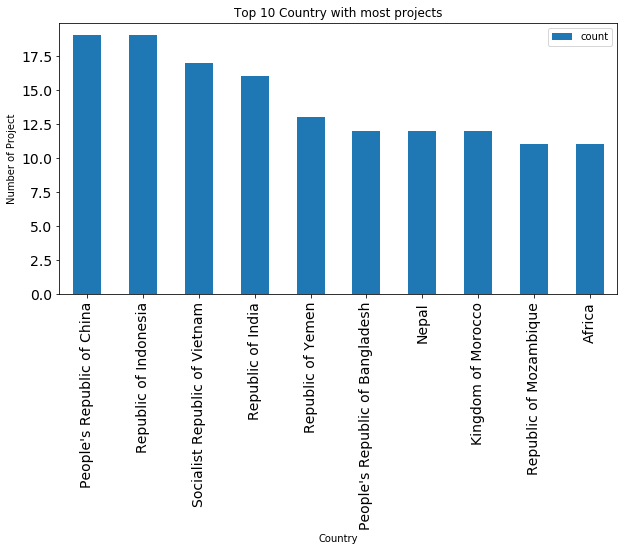

In [47]:
import matplotlib.pyplot as plt

# plot top 10 country with most projects
top_10_country.plot(kind='bar', figsize=(10, 5), fontsize=14)
plt.title('Top 10 Country with most projects')
plt.xlabel('Country')
plt.ylabel('Number of Project')
plt.show()

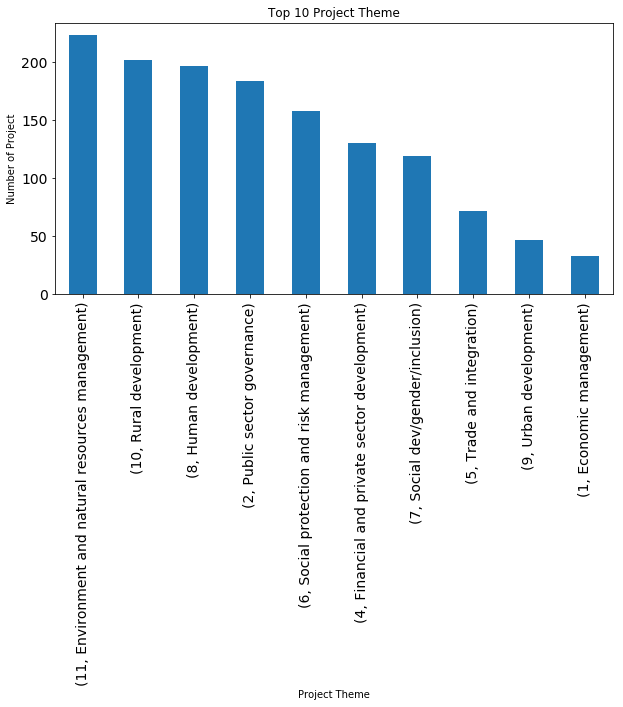

In [48]:
# plot top 10 project themes
top_10_project.plot(kind='bar', figsize=(10, 5), fontsize=14)
plt.title('Top 10 Project Theme')
plt.xlabel('Project Theme')
plt.ylabel('Number of Project')
plt.show()

In [60]:
# fill missing values and find top 10 project themes
d2 = d1.groupby('name').size()
d2 = d2.sort_values(0, ascending=False).iloc[:10]

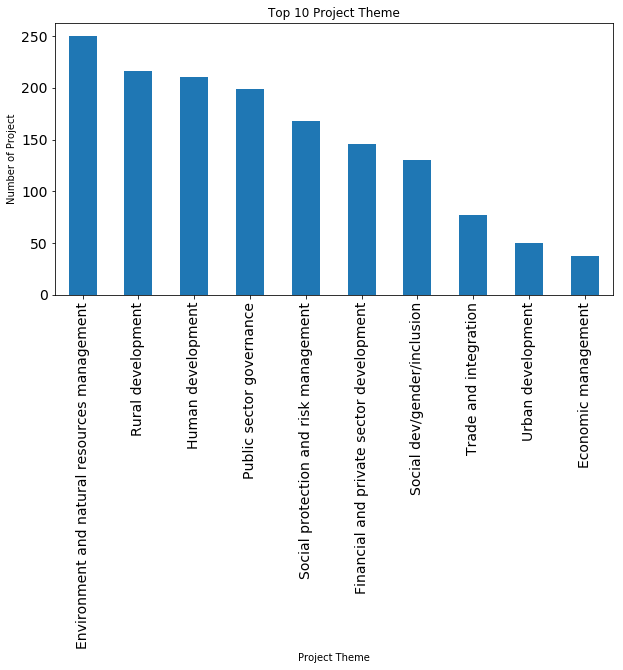

In [62]:
# plot the complete top 10 project themes
d2.plot(kind='bar', figsize=(10, 5), fontsize=14)
plt.title('Top 10 Project Theme')
plt.xlabel('Project Theme')
plt.ylabel('Number of Project')
plt.show()